#  __1st EDA of PUBG mobile's weapon data:__

## Description:
This EDA is done to filter out weapons based on damage, range and bullet types. Factors like rate of fire and detailed damage(Damage against different protective gear) analysis  will be included on the next EDA of the same data set.

## Objective: 
- To filter compare guns with average damage
- To compare weapons of different types using different bullet types on the basis of damage and range,
- To count total weapons in each weapon type,
- TO count total weapons in each bullet type,
- To analyze what weapons are suitable for different ranges


## Tools used:

- __pandas :__ For data wrangling and sorting
- __seaborn + matplotlib:__ For data visualization



In [77]:
import pandas as pd
import seaborn as sns

#Imporitng the data set we'll be working with :
df = pd.read_csv('pubg-weapon-stats.csv')

df.columns

Index(['Weapon Name', 'Weapon Type', 'Bullet Type', 'Damage',
       'Magazine Capacity', 'Range', 'Bullet Speed', 'Rate of Fire',
       'Shots to Kill (Chest)', 'Shots to Kill (Head)', 'Damage Per Second',
       'Fire Mode', 'BDMG_0', 'BDMG_1', 'BDMG_2', 'BDMG_3', 'HDMG_0', 'HDMG_1',
       'HDMG_2', 'HDMG_3'],
      dtype='object')

In [78]:
df.iloc[:5,:5]      # showing first five rows and columns

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity
0,Groza,Assault Rifle,7.62,49,30
1,AKM,Assault Rifle,7.62,49,30
2,M762,Assault Rifle,7.62,47,30
3,MK47 Mutant,Assault Rifle,7.62,49,30
4,AUG A3,Assault Rifle,5.56,43,30


## __Bullet types :__

0.30 : Sniper Ammo,  
12 : Shotgun  
9.00 : 9mm : smg  
0.45 : 45 acp : smg  
5.56 : Ar,dmr  
7.62 : Ar, dmr - heavy

In [79]:
max_dmg = df['Damage'].max()
min_dmg = df['Damage'].min()
avg_dmg = df['Damage'].mean()

print('Avg damage:',round(avg_dmg,2))

info = ['Weapon Name','Weapon Type', 'Bullet Type', 'Damage']

df[info][df['Damage'] > avg_dmg] # displaying guns with damage more than the avg damage

Avg damage: 63.34


,Weapon Name,Weapon Type,Bullet Type,Damage
18,S686,Shotgun,12.00,216
19,S1897,Shotgun,12.00,216
20,S12K,Shotgun,12.00,198
27,AWM,Sniper Rifle,0.30,105
28,M24,Sniper Rifle,7.62,79
29,Kar98,Sniper Rifle,7.62,75
30,Win94,Sniper Rifle,0.45,66
31,Sawed-Off,Pistol,12.00,160
38,Crossbow,Other,NaN,106
39,Pan,Melee,NaN,80


In [80]:
# Filterring out the weapons which don't use bullets 
#Guns only

dg = df[df['Bullet Type'].notna()]
dggg =dg[['Weapon Type', 'Bullet Type']]
dggg.tail()

,Weapon Type,Bullet Type
33,Pistol,0.45
34,Pistol,0.45
35,Pistol,9.00
36,Pistol,9.00
37,Pistol,9.00


<Axes: xlabel='Bullet Type', ylabel='Damage'>

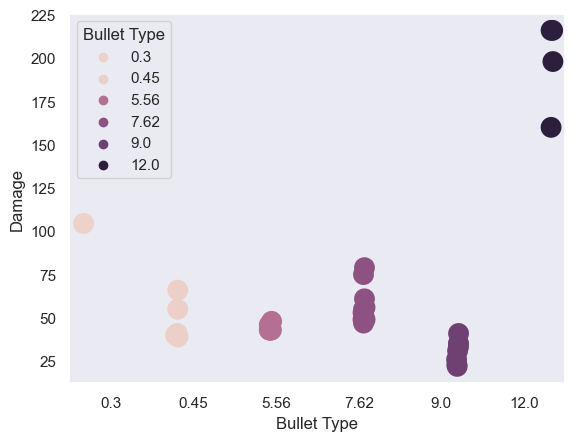

In [81]:
sns.stripplot(data=dg, x= 'Bullet Type' , y = 'Damage', hue = 'Bullet Type', dodge= True , size = 15)

# __Average damage of each bullet type__

In [ ]:
# Creating a new data set with avg damage of each  bullet type

dx = df.groupby('Bullet Type')['Damage'].mean()    
dx.to_csv('Avg_Damage.csv')
dxx = pd.read_csv('Avg_Damage.csv')
dxx

In [83]:
dx.describe() #dx = data frame grouped by bullete type and avg damage of each bullete type

count      6.000000
mean      80.381397
std       62.764340
min       30.750000
25%       45.133333
50%       52.463636
75%       92.931818
max      197.500000
Name: Damage, dtype: float64

<Axes: xlabel='Bullet Type', ylabel='Damage'>

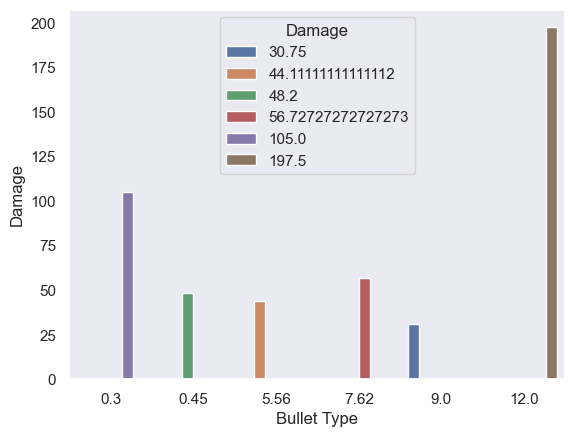

In [108]:
sns.barplot(data= dxx, x = 'Bullet Type', y = 'Damage' , hue = 'Damage')

## Insights:
- Turns out guns using 12.0 bullet type (Shot guns) have the most damage,
- 2nd place taken by guns using bullet type 0.3 which is bullet of the magnum rifle(sniper),
- 3rd place by bullet type 7.62
- Least damage per bullet  = 9.0 that is 9mm

## Question:
- Are these damage values true for all ranges? 

<Axes: xlabel='Damage', ylabel='Range'>

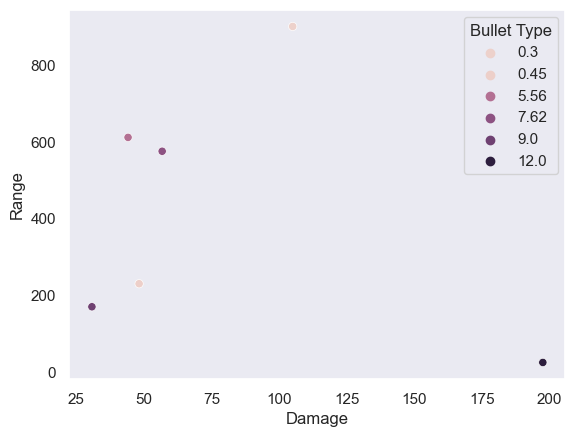

In [85]:
# Comparring avg damage value of each bullet type with range

dm = df.groupby('Bullet Type')[['Damage','Range']].mean()
dm
sns.scatterplot(data=dm, x='Damage',  y= 'Range' , hue = 'Bullet Type', )

<Axes: ylabel='Bullet Type'>

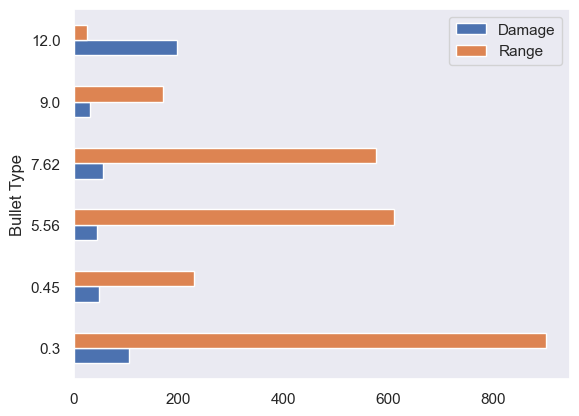

In [86]:
dm.plot.barh()

# __Realization__: 
- Comparring the damage and range of bullet type might not be clear enough,
- Comparring damage and range of different weapon type should help us drive clear insights

## __Creating a new data set where avg damage and range of each waepon type is shown:__

In [87]:
dwp = df.groupby('Weapon Type')[['Damage','Range']].mean()
dwp

,Damage,Range
Weapon Type,,
Assault Rifle,45.200000,530.000000
Designed Marksman Rifle,50.833333,733.333333
Light Machine Gun,48.000000,500.000000
Melee,55.600000,NaN
Other,106.000000,NaN
Pistol,55.857143,30.000000
Shotgun,210.000000,25.000000
Sniper Rifle,81.250000,775.000000
Submachine Gun,34.000000,208.333333


<Axes: ylabel='Weapon Type'>

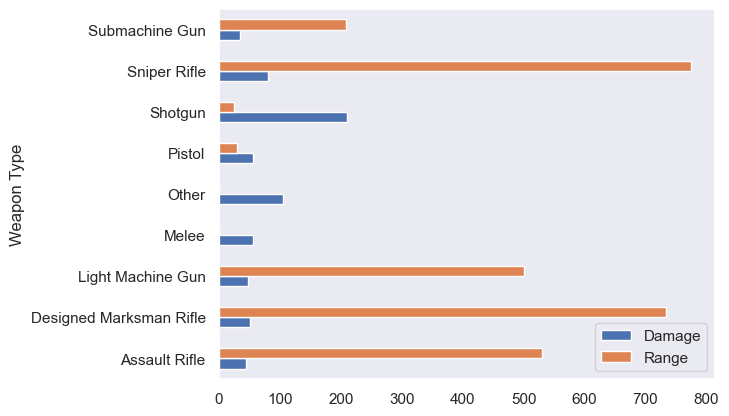

In [88]:
#Visualizing the data set to check the difference 

dwp.plot.barh()

# Insights:
- Best weapon for long range - Snipers 
- Best weapon for  mid range - Assault Rifle
- DMRs are suitable for semi long range and mid range too
- SMGs and shotguns are not suitable for long range


In [89]:
# Counting the number of guns
total = len(df.index)
total

44

<Axes: xlabel='Damage', ylabel='Count'>

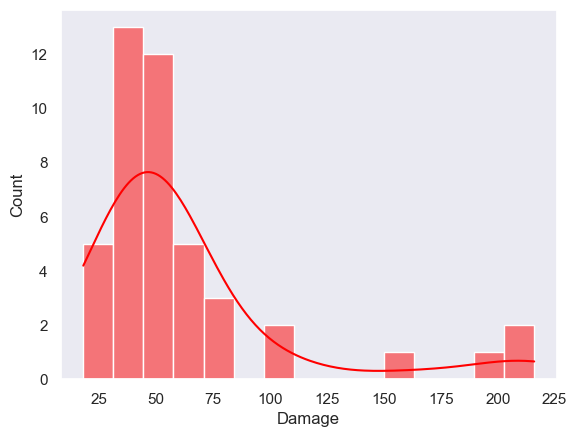

In [90]:

sns.histplot(df['Damage'],bins = 15 , color = 'red' , kde = True)

## Insights:

- Most guns (12) have damage within the range of 25 to 50.
- Ony 2 guns have damage 100,
- only 1 gun with damage 150
- one gun with damage around 200
- 2 guns with damage between 200 and 225

# __To find out gun count of different weapon types__

<Axes: xlabel='Weapon Type', ylabel='Count'>

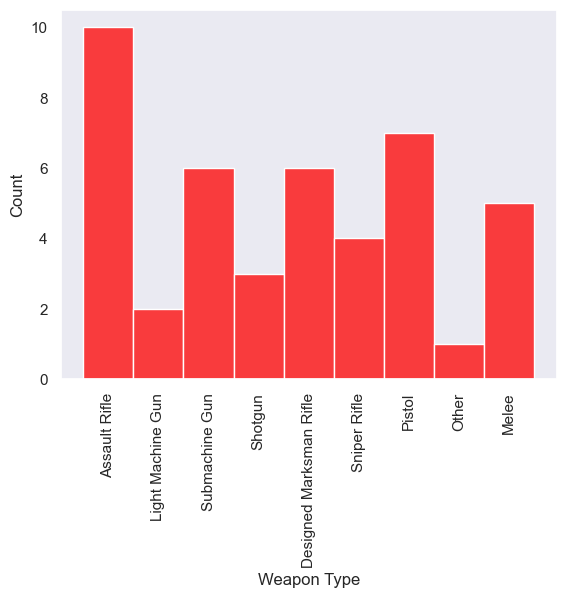

In [91]:
# count of gun and bullet type
import matplotlib.pyplot as plt
sns.set_theme('notebook', style = 'dark')

#To make sure the gun names i.e xlabels don't overlap and are readable
#Rotating each gun type by 90 degrees
plt.xticks(rotation=90)

sns.histplot(df['Weapon Type'],bins = 15 , color = 'red' )

## Insights:
- Majority of guns are AR guns (10)
-Only 2 lmg (dp and m249)
- There are more pistols than SMGs and DMRs in pubg 
- There are more melee weapons than sniper rifels
- Other = Crossbrow (1)

# __To find Most Used Bullet Type:__

<Axes: xlabel='Bullet Type', ylabel='Count'>

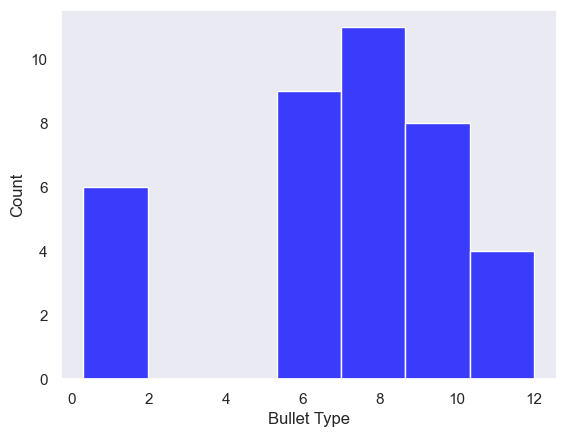

In [92]:
DF =df
sns.histplot(DF['Bullet Type'],bins= 7, color = 'blue')

## Visuals shows range of bullet type values instead of individual bullet type
There are two ways to fix this :
- Create a grouped dataframe by grouping bullet type and counting the number of weapons for each bullet type
- Replace each bullet type value with a string value

We will be using a grouped data frame 

## Creating the grouped data frame (Total guns = 44)

In [93]:
dwp = df.groupby('Bullet Type').size().reset_index(name='Frequency')
dwp

,Bullet Type,Frequency
0,0.30,1
1,0.45,5
2,5.56,9
3,7.62,11
4,9.00,8
5,12.00,4


In [94]:
# Sorting the data frame based on the use of bullet types
dwp = dwp.sort_values('Frequency')
dwp

,Bullet Type,Frequency
0,0.30,1
5,12.00,4
1,0.45,5
4,9.00,8
2,5.56,9
3,7.62,11


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


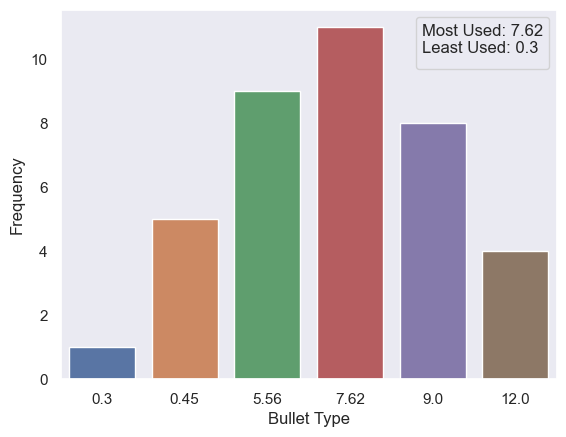

In [102]:
# Just to display the most used and least used bullet type
most_used = dwp.iloc[-1]['Bullet Type']
least_used = dwp.iloc[0]['Bullet Type']

sns.barplot(x='Bullet Type', y='Frequency', data=dwp)

# Set the legend title to show the most and least used bullet types
plt.legend(title=f'Most Used: {most_used}\nLeast Used: {least_used}')

plt.show()





In [ ]:
# Strip plot for bullet type and respective avg damage
sns.stripplot(data=dm , x= 'Bullet Type' , y = 'Damage', hue = 'Damage', dodge = True, size = 15)